In [1]:
import pandas as pd
import numpy as np
import os
import joblib

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier,  kneighbors_graph
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("final_data/filterAdni_data.csv")
df

,AGE,PTEDUCAT,FDG,AV45,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,...,FSVERSION,Hippocampus,Entorhinal,ICV,mPACCdigit,mPACCtrailsB,FAQTOTAL,ADNI_MEM,PTGENDER,DX_bl
0,74.3,16,1.336150,1.20829,0.0,10.67,18.67,5.0,28.0,44.0,...,2,8336.000000,4177.00000,1.984660e+06,-4.310280,-4.114430,0.0,0.405,1,0
1,81.3,18,1.108600,1.20829,4.5,22.00,31.00,8.0,20.0,22.0,...,2,5319.000000,1791.00000,1.920690e+06,-16.244900,-15.829900,10.0,-1.021,1,4
2,67.5,10,1.198979,1.20829,1.0,14.33,21.33,6.0,27.0,37.0,...,2,6869.000000,3983.00000,1.679440e+06,-8.421500,-9.449350,0.0,-0.009,1,2
3,73.7,16,1.259560,1.20829,0.0,8.67,14.67,4.0,29.0,37.0,...,2,7075.000000,4433.00000,1.640770e+06,-1.888680,-1.565830,0.0,0.743,1,0
4,80.4,13,1.198979,1.20829,0.5,18.67,25.67,7.0,25.0,30.0,...,2,5348.000000,2277.00000,1.485830e+06,-10.141700,-10.910900,0.0,-0.219,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,65.6,17,1.198979,1.20829,0.0,0.67,0.67,0.0,30.0,59.0,...,1,7717.300000,3701.00000,1.326860e+06,5.427020,5.167270,3.0,2.978,0,3
2415,61.4,12,1.198979,1.20829,3.5,20.33,31.33,9.0,28.0,22.0,...,3,6929.112247,3631.96577,1.515693e+06,-10.780300,-11.308700,15.0,-0.844,1,2
2416,64.6,12,1.198979,1.20829,0.5,16.33,23.33,7.0,27.0,31.0,...,3,6929.112247,3631.96577,1.515693e+06,-9.659400,-7.517550,0.0,-0.232,0,2
2417,68.9,18,1.198979,1.20829,0.5,5.00,7.00,2.0,30.0,45.0,...,3,6929.112247,3631.96577,1.515693e+06,2.742450,2.540260,0.0,1.392,0,1


In [3]:
X = df.drop(columns=['DX_bl'])
y = df['DX_bl']

In [4]:
display(X), display(y)

,AGE,PTEDUCAT,FDG,AV45,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,...,EcogSPTotal,FSVERSION,Hippocampus,Entorhinal,ICV,mPACCdigit,mPACCtrailsB,FAQTOTAL,ADNI_MEM,PTGENDER
0,74.3,16,1.336150,1.20829,0.0,10.67,18.67,5.0,28.0,44.0,...,1.649447,2,8336.000000,4177.00000,1.984660e+06,-4.310280,-4.114430,0.0,0.405,1
1,81.3,18,1.108600,1.20829,4.5,22.00,31.00,8.0,20.0,22.0,...,1.649447,2,5319.000000,1791.00000,1.920690e+06,-16.244900,-15.829900,10.0,-1.021,1
2,67.5,10,1.198979,1.20829,1.0,14.33,21.33,6.0,27.0,37.0,...,1.649447,2,6869.000000,3983.00000,1.679440e+06,-8.421500,-9.449350,0.0,-0.009,1
3,73.7,16,1.259560,1.20829,0.0,8.67,14.67,4.0,29.0,37.0,...,1.649447,2,7075.000000,4433.00000,1.640770e+06,-1.888680,-1.565830,0.0,0.743,1
4,80.4,13,1.198979,1.20829,0.5,18.67,25.67,7.0,25.0,30.0,...,1.649447,2,5348.000000,2277.00000,1.485830e+06,-10.141700,-10.910900,0.0,-0.219,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,65.6,17,1.198979,1.20829,0.0,0.67,0.67,0.0,30.0,59.0,...,1.540540,1,7717.300000,3701.00000,1.326860e+06,5.427020,5.167270,3.0,2.978,0
2415,61.4,12,1.198979,1.20829,3.5,20.33,31.33,9.0,28.0,22.0,...,3.789470,3,6929.112247,3631.96577,1.515693e+06,-10.780300,-11.308700,15.0,-0.844,1
2416,64.6,12,1.198979,1.20829,0.5,16.33,23.33,7.0,27.0,31.0,...,1.052630,3,6929.112247,3631.96577,1.515693e+06,-9.659400,-7.517550,0.0,-0.232,0
2417,68.9,18,1.198979,1.20829,0.5,5.00,7.00,2.0,30.0,45.0,...,1.105260,3,6929.112247,3631.96577,1.515693e+06,2.742450,2.540260,0.0,1.392,0


0       0
1       4
2       2
3       0
4       2
       ..
2414    3
2415    2
2416    2
2417    1
2418    2
Name: DX_bl, Length: 2419, dtype: int64

(None, None)

In [5]:
print('''
"CN": 0,     # Cognitively Normal - Cognitivamente Normal
"EMCI": 1,   # Early Mild Cognitive Impairment - Comprometimento Cognitivo Leve Inicial
"LMCI": 2,   # Late Mild Cognitive Impairment - Comprometimento Cognitivo Leve Avançado
"SMC": 3,    # Significant Memory Concern - Preocupação Significativa com a Memória
"AD": 4,     # Alzheimer's Disease - Doença de Alzheimer''')


"CN": 0,     # Cognitively Normal - Cognitivamente Normal
"EMCI": 1,   # Early Mild Cognitive Impairment - Comprometimento Cognitivo Leve Inicial
"LMCI": 2,   # Late Mild Cognitive Impairment - Comprometimento Cognitivo Leve Avançado
"SMC": 3,    # Significant Memory Concern - Preocupação Significativa com a Memória
"AD": 4,     # Alzheimer's Disease - Doença de Alzheimer


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
def get_data_validation(df_validation):
    reversed_encoder = joblib.load('transformers/label_encoders.pkl')

    for col, encoder in reversed_encoder.items():
        if col in df_validation.columns:
            df_validation[col] = encoder.inverse_transform(df_validation[col])
        else:
            print(f"Column {col} not found in DataFrame.")
        
    dx_bl = {
        0: "CN",
        1: "EMCI",
        2: "LMCI",
        3: "SMC",
        4: "AD"
    }
    df_validation['DX_bl'] = df_validation['DX_bl'].map(dx_bl)   
            
    df_validation.to_csv('final_data/data_validation.csv', index=False)


val_indices = []
validations = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

for idx, (x_val, y_val) in enumerate(zip(X_train.values, y_train)):
    if validations[y_val] < 3:
        validations[y_val] += 1
        val_indices.append(idx)

X_val = X_train.iloc[val_indices].copy()
y_val = y_train.iloc[val_indices].copy()

X_train = X_train.drop(index=X_train.index[val_indices])
y_train = y_train.drop(index=y_train.index[val_indices])

df_val = X_val.copy()
df_val['DX_bl'] = y_val

get_data_validation(df_val)


Column PTETHCAT not found in DataFrame.
Column PTRACCAT not found in DataFrame.
Column PTMARRY not found in DataFrame.
Column ABETA not found in DataFrame.
Column TAU not found in DataFrame.
Column PTAU not found in DataFrame.


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

#Save scalar format
joblib.dump(scaler, "transformers/scaler.pkl")

(1920, 36) (484, 36)


['transformers/scaler.pkl']

## Train models

#### Neural Network

In [9]:
#Neural Network structure
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(36, 128)   # Input layer
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 128)   # Hidden layer
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(128, 64)   # Hidden layer
        self.dropout3 = nn.Dropout(0.2)
        self.out = nn.Linear(64, 5)# Output layer

    def forward(self, x):
        x = F.normalize(x)              # Optional: normalize inputs
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        return self.out(x)

Epoch 1, Train Loss: 1.6232, Val Loss: 1.6274
Epoch 50, Train Loss: 0.9173, Val Loss: 0.8776
Epoch 100, Train Loss: 0.5931, Val Loss: 0.6182
Epoch 150, Train Loss: 0.5064, Val Loss: 0.5646
Epoch 200, Train Loss: 0.4289, Val Loss: 0.5521
Epoch 207, Train Loss: 0.4129, Val Loss: 0.5496

Early stopping at epoch 207
Neural Network - Accuracy: 0.7975

Neural Network - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       101
           1       0.80      0.87      0.83        90
           2       0.86      0.84      0.85       151
           3       0.67      0.45      0.54        69
           4       0.87      0.89      0.88        73

    accuracy                           0.80       484
   macro avg       0.78      0.78      0.78       484
weighted avg       0.79      0.80      0.79       484


 NN - Accuracy per Class:
Class 0: 0.8416
Class 1: 0.8667
Class 2: 0.8411
Class 3: 0.4493
Class 4: 0.8904


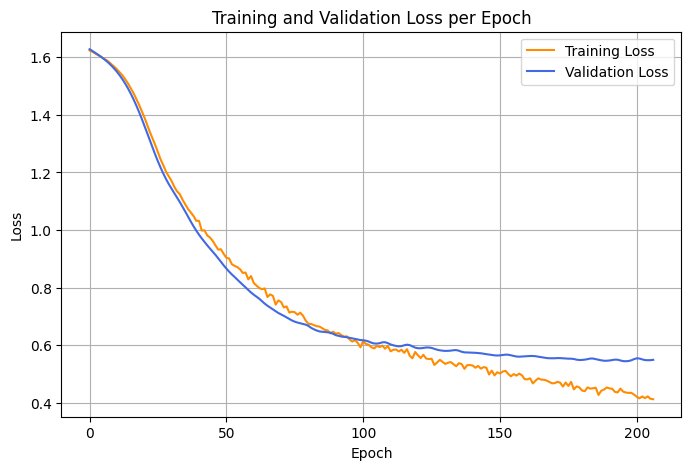

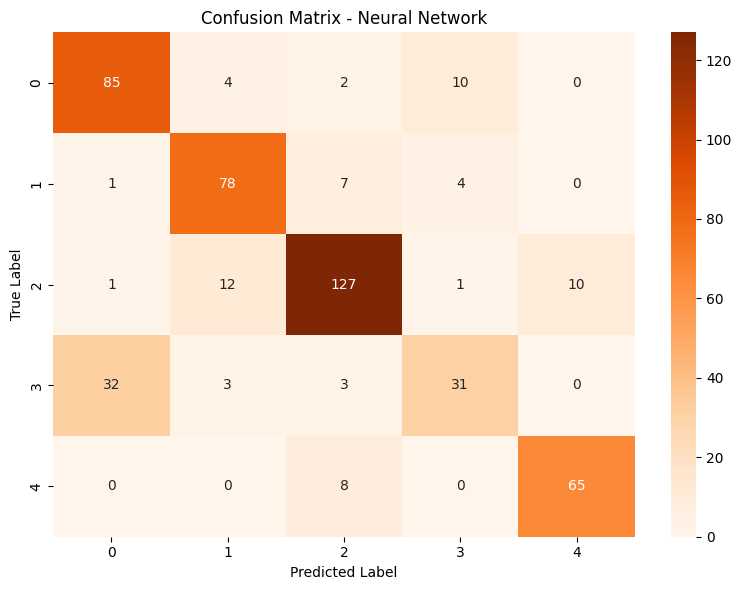

In [10]:
# Initialize model
net = Net()

# Convert data to tensors
x_train_tensor = torch.from_numpy(X_train_scaled).float()
y_train_tensor = torch.from_numpy(y_train.values).long()
x_val_tensor = torch.from_numpy(X_test_scaled).float()
y_val_tensor = torch.from_numpy(y_test.values).long()

# Optimizer and loss
optimizer = torch.optim.AdamW(net.parameters(), lr=0.001, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

train_losses = []
val_losses = []

# Early stopping
best_val_loss = float('inf')
patience = 10
epochs_no_improve = 0
best_model_state = None

# Training loop
max_epochs = 1000
for epoch in range(1, max_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    net.eval()
    with torch.no_grad():
        val_outputs = net(x_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())
    if epoch % 50 == 0 or epoch == 1:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")
    
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_model_state = net.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")
        print(f"\nEarly stopping at epoch {epoch}")
        break
    
# Plot loss curves
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss', color='darkorange')
plt.plot(val_losses, label='Validation Loss', color='royalblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.grid(True)
plt.legend()

# Load best model
if best_model_state is not None:
    net.load_state_dict(best_model_state)

# Evaluation
net.eval()
with torch.no_grad():
    train_preds = net(x_train_tensor).argmax(dim=1).numpy()
    val_preds = net(x_val_tensor).argmax(dim=1).numpy()
    train_labels = y_train_tensor.numpy()
    val_labels = y_val_tensor.numpy()
    


# Metrics
val_accuracy = accuracy_score(val_labels, val_preds)
print(f"Neural Network - Accuracy: {val_accuracy:.4f}")
print("\nNeural Network - Classification Report:")
print(classification_report(val_labels, val_preds))



# Confusion Matrix
cm_nn = confusion_matrix(val_labels, val_preds)

class_accuracies = cm_nn.diagonal() / cm_nn.sum(axis=1)

print("\n NN - Accuracy per Class:")
for i, acc in enumerate(class_accuracies):
    print(f"Class {i}: {acc:.4f}")
    
    
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Neural Network')
plt.tight_layout()
plt.show()

# Save model
torch.save(net.state_dict(), 'models/neural_network_model.pth')

#### Random Forest

Random Forest - Accuracy: 0.8306

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       101
           1       0.84      0.92      0.88        90
           2       0.89      0.89      0.89       151
           3       0.70      0.57      0.62        69
           4       0.88      0.88      0.88        73

    accuracy                           0.83       484
   macro avg       0.82      0.81      0.81       484
weighted avg       0.83      0.83      0.83       484


Random Forest - Accuracy per Class:
Class 0: 0.8119
Class 1: 0.9222
Class 2: 0.8874
Class 3: 0.5652
Class 4: 0.8767


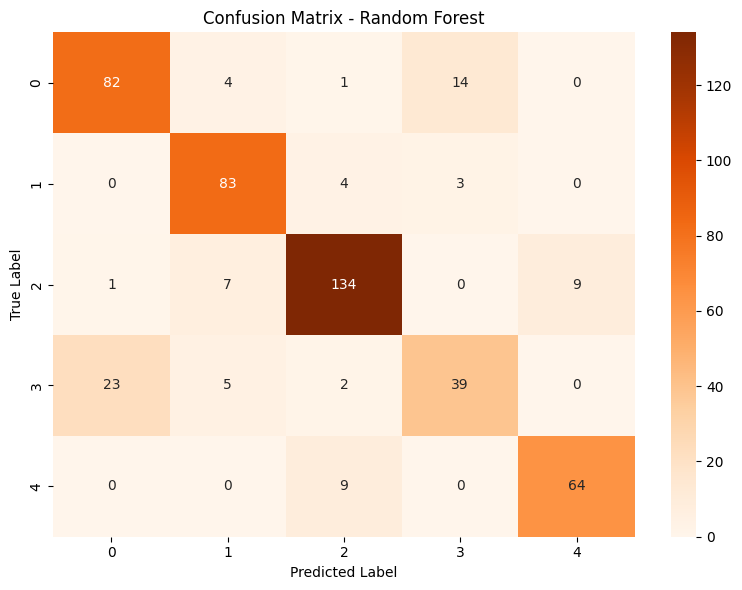

['models/random_forest_model.pkl']

In [18]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate accuracy per class
cm_rf = confusion_matrix(y_test, y_pred_rf)
class_accuracies = cm_rf.diagonal() / cm_rf.sum(axis=1)

print("\nRandom Forest - Accuracy per Class:")
for i, acc in enumerate(class_accuracies):
    print(f"Class {i}: {acc:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

# Save model
joblib.dump(rf_model, 'models/random_forest_model.pkl')

#### Gradient Boosting

Gradient Boosting - Accuracy: 0.8285

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       101
           1       0.85      0.91      0.88        90
           2       0.92      0.91      0.92       151
           3       0.61      0.59      0.60        69
           4       0.87      0.89      0.88        73

    accuracy                           0.83       484
   macro avg       0.81      0.81      0.81       484
weighted avg       0.83      0.83      0.83       484


GradientBoost - Accuracy per Class:
Class 0: 0.7426
Class 1: 0.9111
Class 2: 0.9139
Class 3: 0.5942
Class 4: 0.8904


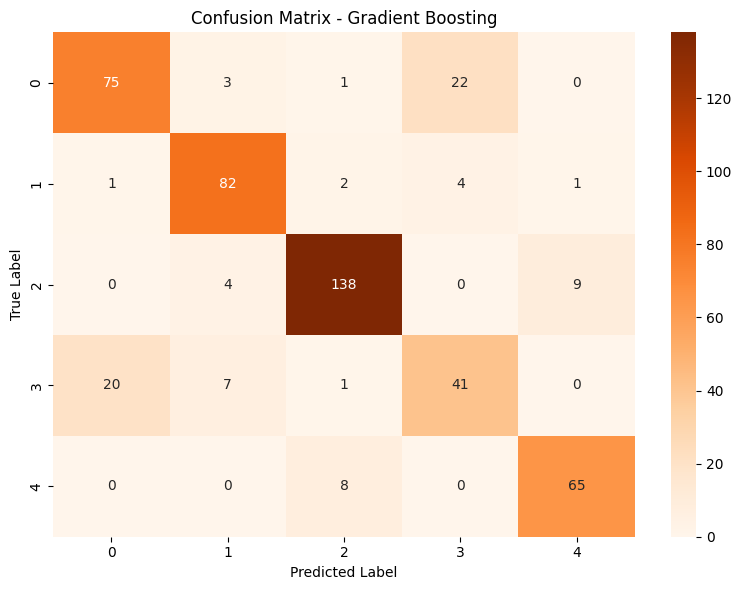

['models/gradient_boosting_model.pkl']

In [12]:
# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, learning_rate=0.17)
gb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test_scaled)

# Metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting - Accuracy: {accuracy_gb:.4f}")
print("\nGradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

class_accuracies = cm_gb.diagonal() / cm_gb.sum(axis=1)

print("\nGradientBoost - Accuracy per Class:")
for i, acc in enumerate(class_accuracies):
    print(f"Class {i}: {acc:.4f}")


plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient Boosting')
plt.tight_layout()
plt.show()

# Save model
joblib.dump(gb_model, 'models/gradient_boosting_model.pkl')

##### LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3731
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 36
[LightGBM] [Info] Start training from score -1.477862
[LightGBM] [Info] Start training from score -1.760988
[LightGBM] [Info] Start training from score -1.275946
[LightGBM] [Info] Start training from score -1.921726
[LightGBM] [Info] Start training from score -1.745950
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

c:\Users\plech\OneDrive\Documentos\Alzheimer-diagnose-ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM - Accuracy: 0.8450

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       101
           1       0.90      0.94      0.92        90
           2       0.90      0.91      0.91       151
           3       0.67      0.62      0.65        69
           4       0.87      0.84      0.85        73

    accuracy                           0.85       484
   macro avg       0.83      0.83      0.83       484
weighted avg       0.84      0.85      0.84       484


 LGBMClassifier - Accuracy per Class:
Class 0: 0.8119
Class 1: 0.9444
Class 2: 0.9139
Class 3: 0.6232
Class 4: 0.8356


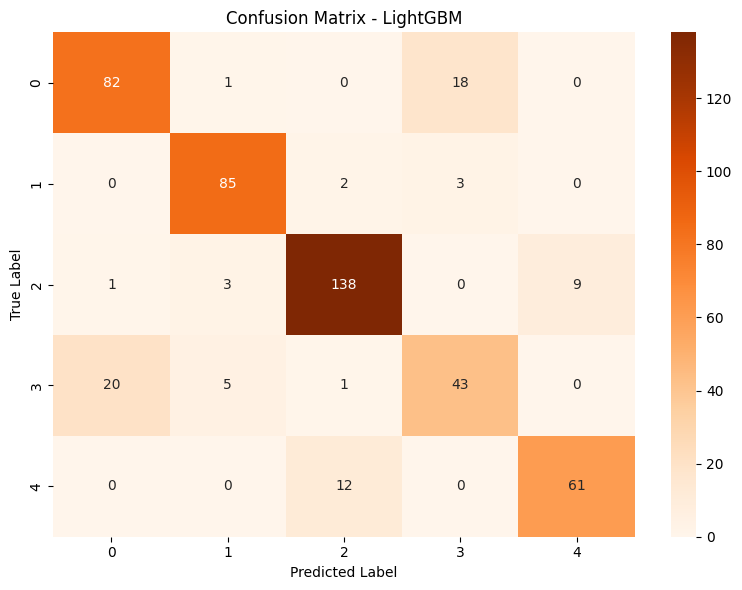

['models/lightgbm_model.pkl']

In [13]:
# Train LightGBM
lgbm_model = LGBMClassifier(random_state=42, learning_rate=0.17, n_estimators=100)
lgbm_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

# Metrics
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM - Accuracy: {accuracy_lgbm:.4f}")
print("\nLightGBM - Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

# Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

class_accuracies = cm_lgbm.diagonal() / cm_lgbm.sum(axis=1)

print("\n LGBMClassifier - Accuracy per Class:")
for i, acc in enumerate(class_accuracies):
    print(f"Class {i}: {acc:.4f}")
    
    
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LightGBM')
plt.tight_layout()
plt.show()

# Save model
joblib.dump(lgbm_model, 'models/lightgbm_model.pkl')

#### XGBoost

XGBoost - Accuracy: 0.8471

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       101
           1       0.89      0.94      0.92        90
           2       0.91      0.93      0.92       151
           3       0.64      0.62      0.63        69
           4       0.93      0.86      0.89        73

    accuracy                           0.85       484
   macro avg       0.83      0.83      0.83       484
weighted avg       0.85      0.85      0.85       484


 XGBClassifier - Accuracy per Class:
Class 0: 0.7723
Class 1: 0.9444
Class 2: 0.9338
Class 3: 0.6232
Class 4: 0.8630


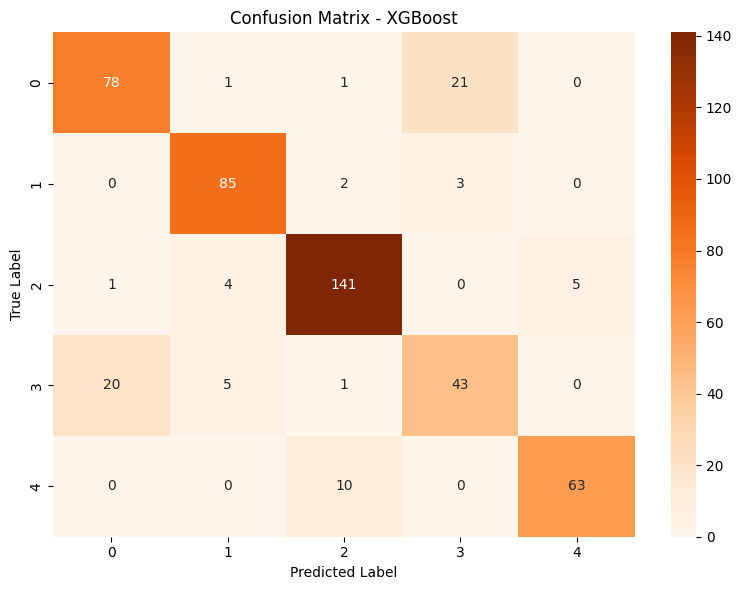

['models/xgboost_model.pkl']

In [14]:
# Train XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss') #logloss for classification and mlogloss for classification with multiple classes
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}")
print("\nXGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
class_accuracies = cm_xgb.diagonal() / cm_xgb.sum(axis=1)

print("\n XGBClassifier - Accuracy per Class:")
for i, acc in enumerate(class_accuracies):
    print(f"Class {i}: {acc:.4f}")
    
    
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()

# Save model
joblib.dump(xgb_model, 'models/xgboost_model.pkl')

#### HistGradientBoostingClassifier

HistGradientBoosting - Accuracy: 0.8492

HistGradientBoosting - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       101
           1       0.88      0.93      0.91        90
           2       0.91      0.92      0.91       151
           3       0.67      0.64      0.65        69
           4       0.90      0.86      0.88        73

    accuracy                           0.85       484
   macro avg       0.83      0.83      0.83       484
weighted avg       0.85      0.85      0.85       484


 HistGradientBoostingClassifier - Accuracy per Class:
Class 0: 0.8020
Class 1: 0.9333
Class 2: 0.9205
Class 3: 0.6377
Class 4: 0.8630


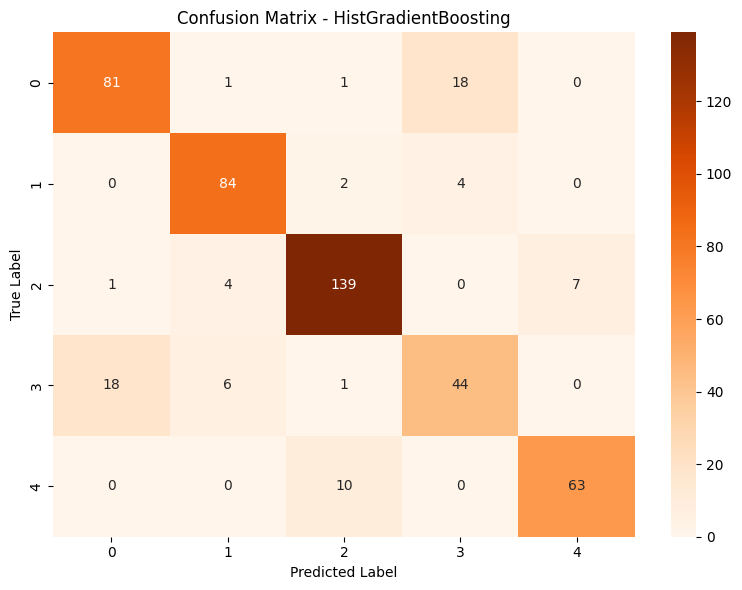

['models/hist_gradient_boosting_model.pkl']

In [15]:
# Train HistGradientBoosting
hgb_model = HistGradientBoostingClassifier(random_state=42) # Ajuste os hiperparâmetros
hgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_hgb = hgb_model.predict(X_test_scaled)

# Metrics
accuracy_hgb = accuracy_score(y_test, y_pred_hgb)
print(f"HistGradientBoosting - Accuracy: {accuracy_hgb:.4f}")
print("\nHistGradientBoosting - Classification Report:")
print(classification_report(y_test, y_pred_hgb))

# Confusion Matrix
cm_hgb = confusion_matrix(y_test, y_pred_hgb)

class_accuracies = cm_hgb.diagonal() / cm_hgb.sum(axis=1)

print("\n HistGradientBoostingClassifier - Accuracy per Class:")
for i, acc in enumerate(class_accuracies):
    print(f"Class {i}: {acc:.4f}")
    
    
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hgb, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - HistGradientBoosting')
plt.tight_layout()
plt.show()

# Save model
joblib.dump(hgb_model, 'models/hist_gradient_boosting_model.pkl')

#### Support Vector Machines (SVC)

SVC - Accuracy: 0.8099

SVC - Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       101
           1       0.80      0.83      0.82        90
           2       0.86      0.85      0.86       151
           3       0.70      0.58      0.63        69
           4       0.89      0.88      0.88        73

    accuracy                           0.81       484
   macro avg       0.80      0.80      0.80       484
weighted avg       0.81      0.81      0.81       484


 SVC - Accuracy per Class:
Class 0: 0.8317
Class 1: 0.8333
Class 2: 0.8543
Class 3: 0.5797
Class 4: 0.8767


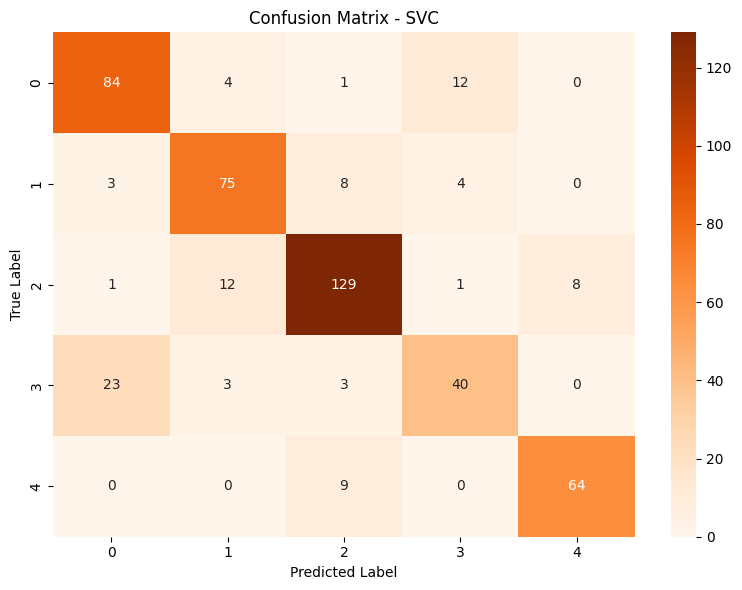

['models/svc_model.pkl']

In [16]:
# Train SVM with probability enabled
svc_model = SVC(random_state=42, decision_function_shape='ovo', probability=True) # implement the “one-versus-one” approach for multi-class classification, and probability=True to enable probability estimates
svc_model.fit(X_train_scaled, y_train)

# Predict probabilities
y_pred_proba_svm = svc_model.predict_proba(X_test_scaled)
y_pred_svm = np.argmax(y_pred_proba_svm, axis=1)

# Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVC - Accuracy: {accuracy_svm:.4f}")
print("\nSVC - Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svm)

class_accuracies = cm_svc.diagonal() / cm_svc.sum(axis=1)

print("\n SVC - Accuracy per Class:")
for i, acc in enumerate(class_accuracies):
    print(f"Class {i}: {acc:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVC')
plt.tight_layout()
plt.show()

# Save model
joblib.dump(svc_model, 'models/svc_model.pkl')

c:\Users\plech\OneDrive\Documentos\Alzheimer-diagnose-ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


(484, 35)

Stacking Ensemble - Accuracy: 0.8430

Stacking Ensemble - Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       101
           1       0.89      0.92      0.91        90
           2       0.92      0.93      0.92       151
           3       0.66      0.55      0.60        69
           4       0.91      0.88      0.90        73

    accuracy                           0.84       484
   macro avg       0.83      0.82      0.82       484
weighted avg       0.84      0.84      0.84       484


 Stacking Ensemble - Accuracy per Class:
Class 0: 0.8119
Class 1: 0.9222
Class 2: 0.9338
Class 3: 0.5507
Class 4: 0.8767


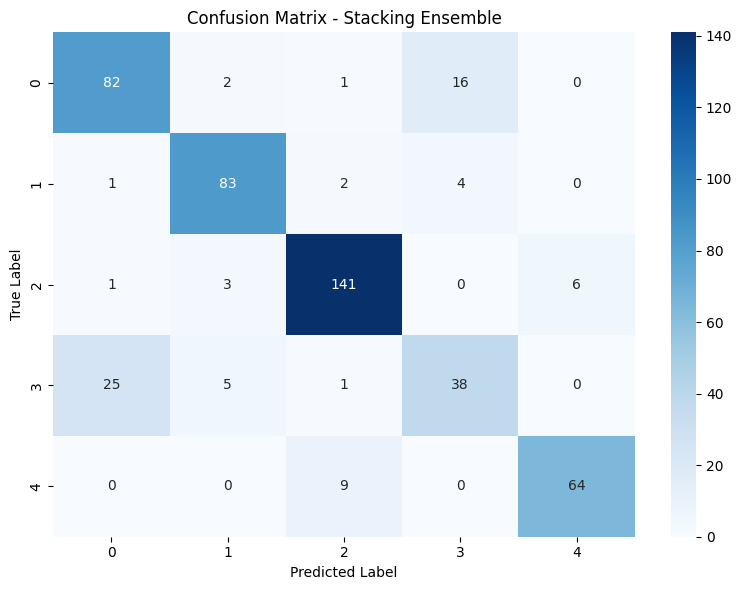

In [ ]:

# Load scikit-learn models
rf_model = joblib.load('models/random_forest_model.pkl')
gb_model = joblib.load('models/gradient_boosting_model.pkl')
hist_gb_model = joblib.load('models/hist_gradient_boosting_model.pkl')
lgbm_model = joblib.load('models/lightgbm_model.pkl')
xgb_model = joblib.load('models/xgboost_model.pkl')
svm_model = joblib.load('models/svc_model.pkl')

# Load neural network model
net = Net()
net.load_state_dict(torch.load('models/neural_network_model.pth'))
net.eval()

# Convert test data to tensors
x_val_tensor = torch.from_numpy(X_test_scaled).float()

# Generate prediction probabilities scikit-learn models
rf_probs = rf_model.predict_proba(X_test_scaled)
gb_probs = gb_model.predict_proba(X_test_scaled)
hgb_probs = hist_gb_model.predict_proba(X_test_scaled)
lgbm_probs = lgbm_model.predict_proba(X_test_scaled)
xgb_probs = xgb_model.predict_proba(X_test_scaled)
svm_probs = svm_model.predict_proba(X_test_scaled)

# Generate prediction probabilities neural network
with torch.no_grad():
    nn_logits = net(x_val_tensor)
    nn_probs = F.softmax(nn_logits, dim=1).numpy()

# Stack predictions as features for meta-model
stacked_features = np.hstack((rf_probs, gb_probs, hgb_probs, lgbm_probs, xgb_probs, svm_probs, nn_probs))

# Train meta-classifier
meta_model = LogisticRegression(random_state=42, max_iter=1000)
meta_model.fit(stacked_features, y_test)

# Predict the final output using the stacked features
y_pred_ensemble = meta_model.predict(stacked_features)

joblib.dump(meta_model, "models/metamodelo.pkl")

# Evaluate the Stacking Ensemble
accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"\nStacking Ensemble - Accuracy: {accuracy:.4f}")
print("\nStacking Ensemble - Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ensemble)

class_accuracies = cm.diagonal() / cm.sum(axis=1)

print("\n Stacking Ensemble - Accuracy per Class:")
for i, acc in enumerate(class_accuracies):
    print(f"Class {i}: {acc:.4f}")
    
    
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Stacking Ensemble')
plt.tight_layout()
plt.show()